In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [38]:
root_path = "dataset/"
file_path = "ibm.csv"
file_cleaned_path = "cleaned_ibm_data.csv"
data = pd.read_csv(root_path + file_path)
print(data.head())

                        Date      Open      High       Low     Close  Volume  \
0  1962-01-02 00:00:00-05:00  1.530517  1.530517  1.513320  1.513320  407940   
1  1962-01-03 00:00:00-05:00  1.513320  1.526548  1.513320  1.526548  305955   
2  1962-01-04 00:00:00-05:00  1.526548  1.526548  1.510674  1.511336  274575   
3  1962-01-05 00:00:00-05:00  1.509353  1.509353  1.478927  1.481573  384405   
4  1962-01-08 00:00:00-05:00  1.480251  1.480251  1.441889  1.453794  572685   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [39]:
data_filtered = data[["Date", "Open", "High", "Low", "Volume", "Close"]].sort_values(by="Date")
data_cleaned = data_filtered.dropna()
print(data_filtered.head())

                        Date      Open      High       Low  Volume     Close
0  1962-01-02 00:00:00-05:00  1.530517  1.530517  1.513320  407940  1.513320
1  1962-01-03 00:00:00-05:00  1.513320  1.526548  1.513320  305955  1.526548
2  1962-01-04 00:00:00-05:00  1.526548  1.526548  1.510674  274575  1.511336
3  1962-01-05 00:00:00-05:00  1.509353  1.509353  1.478927  384405  1.481573
4  1962-01-08 00:00:00-05:00  1.480251  1.480251  1.441889  572685  1.453794


In [34]:
data_cleaned.to_csv(root_path + file_cleaned_path, index=False)

In [40]:
data = pd.read_csv(root_path + file_cleaned_path)
data.head()

,Date,Open,High,Low,Volume,Close
0,1962-01-02 00:00:00-05:00,1.530517,1.530517,1.513320,407940,1.513320
1,1962-01-03 00:00:00-05:00,1.513320,1.526548,1.513320,305955,1.526548
2,1962-01-04 00:00:00-05:00,1.526548,1.526548,1.510674,274575,1.511336
3,1962-01-05 00:00:00-05:00,1.509353,1.509353,1.478927,384405,1.481573
4,1962-01-08 00:00:00-05:00,1.480251,1.480251,1.441889,572685,1.453794


In [44]:
data["Target"] = data["Close"].shift(-1)
data.head()

,Date,Open,High,Low,Volume,Close,Target
0,1962-01-02 00:00:00-05:00,1.530517,1.530517,1.513320,407940,1.513320,1.526548
1,1962-01-03 00:00:00-05:00,1.513320,1.526548,1.513320,305955,1.526548,1.511336
2,1962-01-04 00:00:00-05:00,1.526548,1.526548,1.510674,274575,1.511336,1.481573
3,1962-01-05 00:00:00-05:00,1.509353,1.509353,1.478927,384405,1.481573,1.453794
4,1962-01-08 00:00:00-05:00,1.480251,1.480251,1.441889,572685,1.453794,1.470989


In [ ]:
data_last = data.tail(16)
data_last

,Date,Open,High,Low,Volume,Close,Target
15781,2024-09-12 00:00:00-04:00,210.000000,212.649994,208.270004,4616400,211.610001,214.789993
15782,2024-09-13 00:00:00-04:00,212.479996,216.089996,212.130005,4572300,214.789993,217.160004
15783,2024-09-16 00:00:00-04:00,215.880005,217.899994,215.520004,4176100,217.160004,214.130005
15784,2024-09-17 00:00:00-04:00,217.250000,218.839996,213.000000,5635200,214.130005,214.940002
15785,2024-09-18 00:00:00-04:00,214.130005,216.860001,213.589996,3482800,214.940002,213.889999
15786,2024-09-19 00:00:00-04:00,218.009995,218.479996,210.369995,5279600,213.889999,217.699997
15787,2024-09-20 00:00:00-04:00,214.330002,217.850006,213.740005,9958800,217.699997,220.500000
15788,2024-09-23 00:00:00-04:00,218.000000,220.619995,217.270004,4074800,220.500000,220.970001
15789,2024-09-24 00:00:00-04:00,219.779999,221.190002,218.160004,3183900,220.970001,221.229996
15790,2024-09-25 00:00:00-04:00,221.169998,221.850006,220.160004,2537800,221.229996,223.429993


In [48]:
data_last.to_csv(root_path + "data_llm.csv", index=False)

In [7]:
# middle_data = data[len(data) // 2 - 5: len(data) // 2 + 5]  # Adjust 5 for more or fewer rows
# middle_data.head()


In [8]:
final_data_row = data.tail(1)
data.drop(data.tail(1).index, inplace=True)
data.dropna(inplace=True)
final_data_row

,Date,Open,High,Low,Volume,Close,Target
15825,2024-11-13 00:00:00-05:00,209.5,211.410004,209.070099,2186158,210.669998,NaN


In [9]:
# plotting correlation
data.iloc[:, 1:].corr()['Target']

Open      0.999714
High      0.999765
Low       0.999767
Volume    0.133558
Close     0.999812
Target    1.000000
Name: Target, dtype: float64

In [10]:
# Features scaling
model_features = data.drop("Target", axis=1).drop("Date", axis=1)
model_target = data["Target"]

model_feature_scaler = MinMaxScaler()
model_feature_scaler.fit(model_features)
model_scaled_features = pd.DataFrame(model_feature_scaler.transform(model_features), columns=model_features.columns.tolist())

model_target_scaler = MinMaxScaler()
model_target_scaler.fit(model_target.values.reshape(-1,1))
model_scaled_target = pd.DataFrame(model_target_scaler.transform(model_target.values.reshape(-1,1)), columns=["Target"])

In [11]:
def create_dataset(X_data, y_data, t_steps):
    X, y = [], []
    for i in range(len(X_data) - t_steps):
        v = X_data.iloc[i:(i + t_steps)].values
        X.append(v)
        y.append(y_data.iloc[i + t_steps])
    return np.array(X), np.array(y)

In [12]:
t_steps = 60
X, y = create_dataset(model_scaled_features, model_scaled_target, t_steps)
X.shape, y.shape

((15765, 60, 5), (15765, 1))

In [13]:
train_size = int(0.80 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((12612, 60, 5), (3153, 60, 5), (12612, 1), (3153, 1))

((12612, 60, 5), (3153, 60, 5), (12612, 1), (3153, 1))

In [14]:
X_train.shape

(12612, 60, 5)

In [15]:
import tensorflow as tf

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

2024-11-29 13:48:36.199551: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14782 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


(TensorShape([12612, 60, 5]),
 TensorShape([12612, 1]),
 TensorShape([3153, 60, 5]),
 TensorShape([3153, 1]))

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [17]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_step, features)
input_shape

(60, 5)

In [18]:
# # X_train.shape[1]

# prev batch size = 64
# lstm units = 50
# learning rate =
# sequence length = 107
# Best Parameters: LSTM Units = 53, Batch Size = 24, Learning Rate = 0.003813, Sequence Length (t_steps) = 107
# Best Validation Loss: 0.001294

### LSTM Model

In [19]:
# model = Sequential([
#     LSTM(units=50, return_sequences=True, input_shape=input_shape),
#     LSTM(units=50),
#     Dense(units=1)
# ])

from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


model = Sequential([
    # First LSTM layer with regularization
    LSTM(50, return_sequences=True,
            kernel_regularizer=l2(0.01),
            recurrent_regularizer=l2(0.01),
            input_shape=input_shape),
    Dropout(0.2),

    # Second LSTM layer
    LSTM(50, return_sequences=False,
            kernel_regularizer=l2(0.01),
            recurrent_regularizer=l2(0.01)),
    Dropout(0.2),

    # Output layer
    Dense(1)
])

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Reduce learning rate when plateau is reached
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-5
)

In [22]:
# Training the model
num_epochs = 30
batch_size = 64

history_lstm = model.fit(
        X_train, y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

# history_lstm = model.fit(
#     X_train,
#     y_train,
#     epochs=num_epochs,
#     batch_size=batch_size,
#     validation_data=(X_test, y_test)
# )

Epoch 1/30


2024-11-29 13:42:11.213256: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2024-11-29 13:42:11.420293: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x25f3d470 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-29 13:42:11.420327: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla V100-PCIE-16GB, Compute Capability 7.0
2024-11-29 13:42:11.426251: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-29 13:42:11.595862: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


198/198 [==============================] - 9s 16ms/step - loss: 0.4335 - val_loss: 0.0242 - lr: 0.0010
Epoch 2/30
198/198 [==============================] - 2s 11ms/step - loss: 0.0060 - val_loss: 0.0040 - lr: 0.0010
Epoch 3/30
198/198 [==============================] - 2s 11ms/step - loss: 0.0015 - val_loss: 0.0060 - lr: 0.0010
Epoch 4/30
198/198 [==============================] - 2s 11ms/step - loss: 0.0011 - val_loss: 0.0039 - lr: 0.0010
Epoch 5/30
198/198 [==============================] - 2s 11ms/step - loss: 9.4777e-04 - val_loss: 0.0025 - lr: 0.0010
Epoch 6/30
198/198 [==============================] - 2s 11ms/step - loss: 8.1550e-04 - val_loss: 0.0021 - lr: 0.0010
Epoch 7/30
198/198 [==============================] - 2s 11ms/step - loss: 8.2081e-04 - val_loss: 0.0023 - lr: 0.0010
Epoch 8/30
198/198 [==============================] - 2s 11ms/step - loss: 7.2055e-04 - val_loss: 0.0064 - lr: 0.0010
Epoch 9/30
198/198 [==============================] - 2s 11ms/step - loss: 6.8563e-

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31,451
Trainable params: 31,451
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Evaluate on test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

99/99 [==============================] - 0s 4ms/step - loss: 0.0016
Test Loss: 0.0016062877839431167


### Calculating the metrices

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae


In [26]:
# Making predictions on the test set
# lstm_predictions = model.predict(X_test)
from sklearn.preprocessing import MinMaxScaler


predictions = model.predict(X_test)

# Adding dummy columns to match the original scaled data shape (5 columns)
# 4 dummy columns to match Open, High, Low, Volume
dummy_columns = np.zeros((predictions.shape[0], 4))
predicted_prices_scaled = np.concatenate((dummy_columns, predictions), axis=1)

# Applying inverse transformation to get back to original scale
predicted_prices = model_feature_scaler.inverse_transform(predicted_prices_scaled)[:, -1]

# for actual prices
actual_prices_scaled = np.concatenate((dummy_columns, y_test.numpy().reshape(-1, 1)), axis=1)
actual_prices = model_feature_scaler.inverse_transform(actual_prices_scaled)[:, -1]

# Calculating metrics
lstm_mse, lstm_rmse, lstm_mae = calculate_metrics(actual_prices, predicted_prices)
print(f'LSTM Model - MSE: {lstm_mse:.4f}, RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}')


99/99 [==============================] - 1s 3ms/step
LSTM Model - MSE: 77.6217, RMSE: 8.8103, MAE: 5.6407


### Loss plot of LSTM model

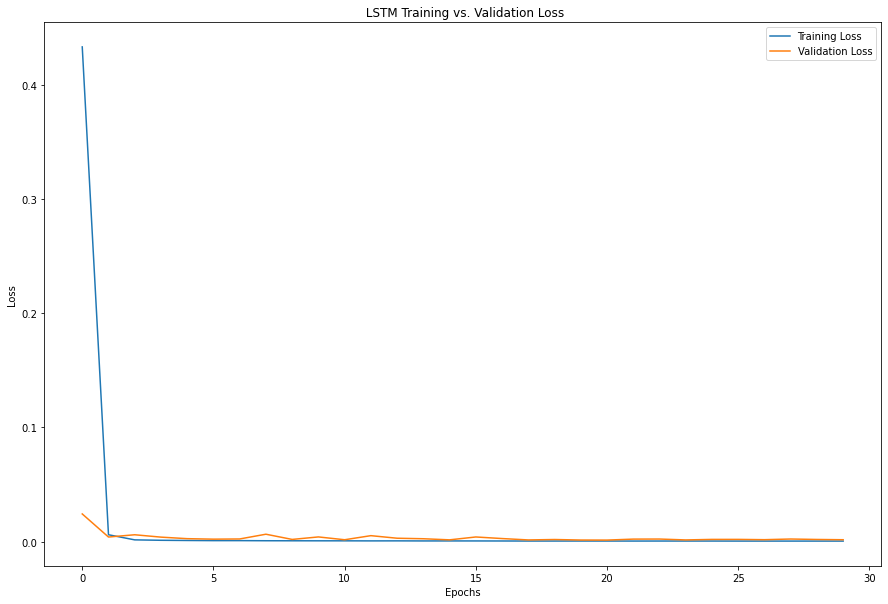

In [31]:
import matplotlib.pyplot as plt

%matplotlib inline 


plt.figure(figsize=(15, 10))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title(' LSTM Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

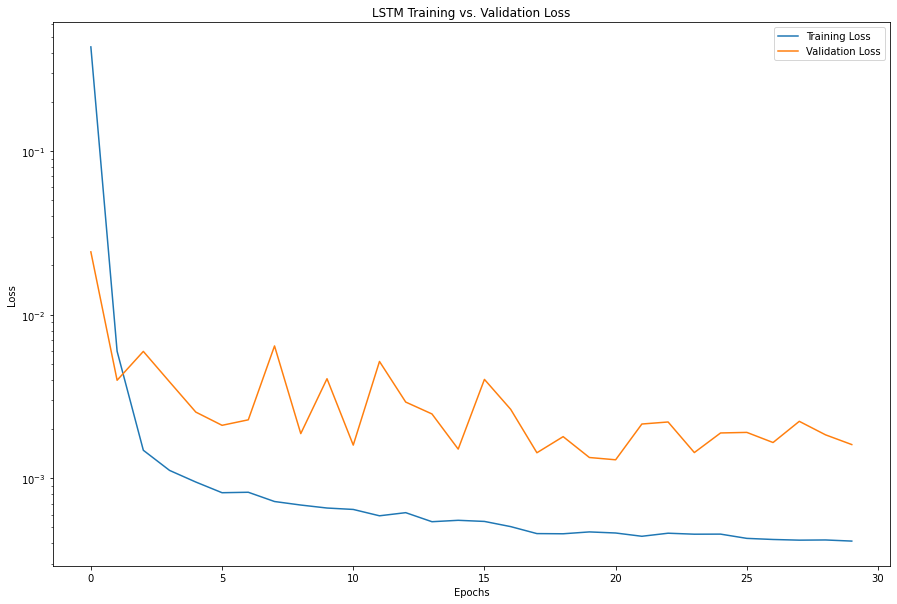

In [32]:

# Your existing plotting code with log scale

plt.figure(figsize=(15, 10))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.yscale('log')  # Setting the y-axis to logarithmic scale


plt.legend()
plt.show()


### Random search for hyperparameter optimization



In [24]:
import random
import numpy as np
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-5
)

param_ranges = {
    "lstm_units": (32, 256),
    "batch_size": (16, 128),
    "learning_rate": (1e-5, 1e-2),
    "t_steps": (30, 120)
}


n_samples = 20

def generate_random_params():
    lstm_units = random.randint(param_ranges["lstm_units"][0], param_ranges["lstm_units"][1])
    batch_size = random.randint(param_ranges["batch_size"][0], param_ranges["batch_size"][1])
    learning_rate = random.uniform(param_ranges["learning_rate"][0], param_ranges["learning_rate"][1])
    t_steps = random.randint(param_ranges["t_steps"][0], param_ranges["t_steps"][1])
    return lstm_units, batch_size, learning_rate, t_steps

def evaluate_model(lstm_units, batch_size, learning_rate, t_steps):

    global X_train, y_train, X_test, y_test
    X, y = create_dataset(model_scaled_features, model_scaled_target, t_steps)
    train_size = int(0.80 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]


    X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
    y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
    X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
    y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

    input_shape = (t_steps, X_train.shape[2])

    model = Sequential([
    # First LSTM layer with regularization
    LSTM(lstm_units, return_sequences=True,
            kernel_regularizer=l2(0.01),
            recurrent_regularizer=l2(0.01),
            input_shape=input_shape),
    Dropout(0.2),

    # Second LSTM layer
    LSTM(lstm_units, return_sequences=False,
            kernel_regularizer=l2(0.01),
            recurrent_regularizer=l2(0.01)),
    Dropout(0.2),

    # Output layer
    Dense(1) ])

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # Training model
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    val_loss = min(history.history['val_loss'])
    return val_loss

# Performing random search
best_params = None
best_loss = float("inf")

for i in range(n_samples):
    lstm_units, batch_size, learning_rate, t_steps = generate_random_params()

    # Log the parameters being tested
    print(f"Testing: LSTM Units = {lstm_units}, Batch Size = {batch_size}, "
          f"Learning Rate = {learning_rate:.6f}, Sequence Length (t_steps) = {t_steps}")

    # Evaluate the model
    val_loss = evaluate_model(lstm_units, batch_size, learning_rate, t_steps)
    
    print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

    # Log the result
    print(f"Validation Loss: {val_loss:.6f}")

    # Update best parameters if the current loss is lower
    if val_loss < best_loss:
        best_loss = val_loss
        best_params = (lstm_units, batch_size, learning_rate, t_steps)

# Print the best hyperparameters and their validation loss
print(f"Best Parameters: LSTM Units = {best_params[0]}, Batch Size = {best_params[1]}, "
      f"Learning Rate = {best_params[2]:.6f}, Sequence Length (t_steps) = {best_params[3]}")
print(f"Best Validation Loss: {best_loss:.6f}")


Testing: LSTM Units = 104, Batch Size = 96, Learning Rate = 0.006656, Sequence Length (t_steps) = 118
Epoch 1/10
131/131 [==============================] - 8s 22ms/step - loss: 0.1625 - val_loss: 0.0296 - lr: 0.0067
Epoch 2/10
131/131 [==============================] - 2s 15ms/step - loss: 0.0012 - val_loss: 0.0021 - lr: 0.0067
Epoch 3/10
131/131 [==============================] - 2s 15ms/step - loss: 0.0013 - val_loss: 0.0109 - lr: 0.0067
Epoch 4/10
131/131 [==============================] - 2s 14ms/step - loss: 0.0011 - val_loss: 0.0101 - lr: 0.0067
Epoch 5/10
131/131 [==============================] - 2s 14ms/step - loss: 9.6434e-04 - val_loss: 0.0021 - lr: 0.0067
Epoch 6/10
131/131 [==============================] - 2s 14ms/step - loss: 0.0012 - val_loss: 0.0055 - lr: 0.0067
Epoch 7/10
131/131 [==============================] - 2s 14ms/step - loss: 8.4534e-04 - val_loss: 0.0027 - lr: 0.0067
Epoch 8/10
131/131 [==============================] - 2s 15ms/step - loss: 6.0255e-04 - val_

## Using these parameters and testing our LSTM model

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

t_steps = 115
X, y = create_dataset(model_scaled_features, model_scaled_target, t_steps)

train_size = int(0.80 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#converting into tensor
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

input_shape = (X_train.shape[1], X_train.shape[2])

#batch size and no of epochs
num_epochs = 30
batch_size = 112

model_optimized = Sequential([
    # First LSTM layer with regularization
    LSTM(97, return_sequences=True,
            kernel_regularizer=l2(0.01),
            recurrent_regularizer=l2(0.01),
            input_shape=input_shape),
    Dropout(0.2),

    # Second LSTM layer
    LSTM(97, return_sequences=False,
            kernel_regularizer=l2(0.01),
            recurrent_regularizer=l2(0.01)),
    Dropout(0.2),

    # Output layer
    Dense(1)
])

model_optimized.compile(optimizer=Adam(learning_rate=0.002984), loss='mean_squared_error')

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Reduce learning rate when plateau is reached
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-5
)

history_lstm = model_optimized.fit(
        X_train, y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

Epoch 1/30
113/113 [==============================] - 8s 25ms/step - loss: 0.3400 - val_loss: 0.0067 - lr: 0.0030
Epoch 2/30
113/113 [==============================] - 2s 15ms/step - loss: 0.0016 - val_loss: 0.0027 - lr: 0.0030
Epoch 3/30
113/113 [==============================] - 2s 14ms/step - loss: 0.0011 - val_loss: 0.0054 - lr: 0.0030
Epoch 4/30
113/113 [==============================] - 2s 14ms/step - loss: 9.2468e-04 - val_loss: 0.0075 - lr: 0.0030
Epoch 5/30
113/113 [==============================] - 2s 14ms/step - loss: 7.9401e-04 - val_loss: 0.0017 - lr: 0.0030
Epoch 6/30
113/113 [==============================] - 2s 14ms/step - loss: 7.4280e-04 - val_loss: 0.0024 - lr: 0.0030
Epoch 7/30
113/113 [==============================] - 2s 15ms/step - loss: 7.7032e-04 - val_loss: 0.0017 - lr: 0.0030
Epoch 8/30
113/113 [==============================] - 2s 14ms/step - loss: 7.3883e-04 - val_loss: 0.0018 - lr: 0.0030
Epoch 9/30
113/113 [==============================] - 2s 14ms/step -

### Plotting the loss curve


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

predictions = model_optimized.predict(X_test)

# Adding dummy columns to match the original scaled data shape (5 columns)
# 4 dummy columns to match Open, High, Low, Volume
dummy_columns = np.zeros((predictions.shape[0], 4))
predicted_prices_scaled = np.concatenate((dummy_columns, predictions), axis=1)

# Applying inverse transformation to get back to original scale
predicted_prices = model_feature_scaler.inverse_transform(predicted_prices_scaled)[:, -1]

# for actual prices
actual_prices_scaled = np.concatenate((dummy_columns, y_test.numpy().reshape(-1, 1)), axis=1)
actual_prices = model_feature_scaler.inverse_transform(actual_prices_scaled)[:, -1]

# Calculating metrics
lstm_mse, lstm_rmse, lstm_mae = calculate_metrics(actual_prices, predicted_prices)
print(f'LSTM Model - MSE: {lstm_mse:.4f}, RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}')

99/99 [==============================] - 1s 7ms/step
LSTM Model - MSE: 70.5880, RMSE: 8.4017, MAE: 5.6582


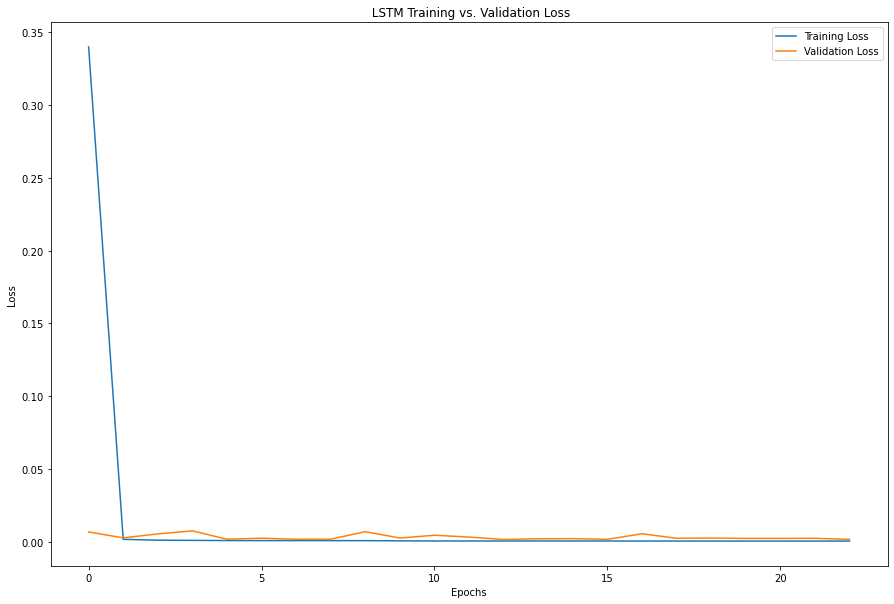

In [28]:
%matplotlib inline

plt.figure(figsize=(15, 10))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title(' LSTM Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

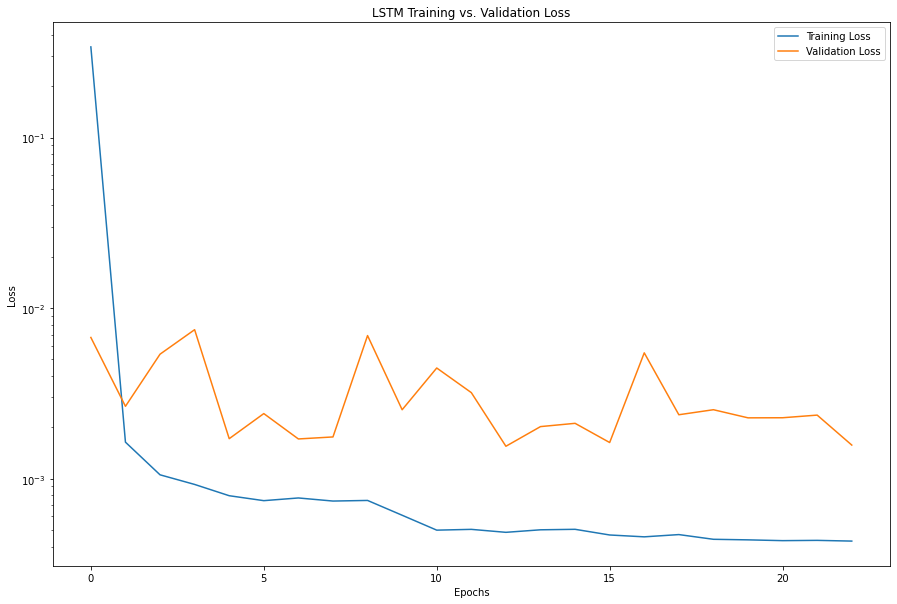

In [29]:
# Your existing plotting code with log scale

%matplotlib inline

plt.figure(figsize=(15, 10))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.yscale('log')  # Setting the y-axis to logarithmic scale

plt.legend()
plt.show()

### Implementing pyswarm for optimization

In [30]:
!pip install pyswarm

Defaulting to user installation because normal site-packages is not writeable


In [32]:
import random
import numpy as np
import pyswarm
from pyswarm import pso
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-5
)
param_ranges = {
    "lstm_units": (32, 256),       # Range for LSTM units
    "batch_size": (16, 128),       # Range for batch size
    "learning_rate": (1e-5, 1e-2), # Range for learning rate
    "t_steps": (30, 120)           # Range for sequence length
}

bounds = [
    param_ranges["lstm_units"],       # Bounds for LSTM units
    param_ranges["batch_size"],       # Bounds for batch size
    param_ranges["learning_rate"],    # Bounds for learning rate
    param_ranges["t_steps"]           # Bounds for sequence length
]

def objective_function(params):
    # Extract and round parameters
    lstm_units = int(params[0])  # Unused in this architecture but kept for consistency
    batch_size = int(params[1])
    learning_rate = float(params[2])
    t_steps = int(params[3])

    print(f"\nTrying Hyperparameters: LSTM Units = {lstm_units}, Batch Size = {batch_size}, "
          f"Learning Rate = {learning_rate:.6f}, Sequence Length (t_steps) = {t_steps}")

    # Update sequence length for data creation
    global X_train, y_train, X_test, y_test
    X, y = create_dataset(model_scaled_features, model_scaled_target, t_steps)
    train_size = int(0.80 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Convert to tensors
    X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
    y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
    X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
    y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)
    
    input_shape = (t_steps, X_train.shape[2])
    print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

    # Define the new model architecture
    model = Sequential([
        # First LSTM layer with regularization
        LSTM(lstm_units, return_sequences=True,
             kernel_regularizer=l2(0.01),
             recurrent_regularizer=l2(0.01),
             input_shape=input_shape),
        Dropout(0.2),

        # Second LSTM layer
        LSTM(lstm_units, return_sequences=False,
             kernel_regularizer=l2(0.01),
             recurrent_regularizer=l2(0.01)),
        Dropout(0.2),

        # Output layer
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # Train the model
    history = model.fit(
        X_train_tensor, y_train_tensor,
        epochs=10,
        batch_size=batch_size,
        validation_data=(X_test_tensor, y_test_tensor),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Get validation loss
    val_loss = min(history.history['val_loss'])

    print(f"Validation Loss: {val_loss:.6f}")

    # Return the validation loss
    return val_loss

# Run PSO with the new model
best_params, best_loss = pso(
    objective_function,
    lb=[b[0] for b in bounds],  # Lower bounds
    ub=[b[1] for b in bounds],  # Upper bounds
    swarmsize=10,               # Number of particles
    maxiter=10,                 # Number of iterations
    debug=True                  # Enable logging
)

print(f"\nBest Parameters: LSTM Units = {int(best_params[0])}, Batch Size = {int(best_params[1])}, "
      f"Learning Rate = {best_params[2]:.6f}, Sequence Length (t_steps) = {int(best_params[3])}")
print(f"Best Validation Loss: {best_loss:.6f}")

No constraints given.

Trying Hyperparameters: LSTM Units = 233, Batch Size = 27, Learning Rate = 0.004559, Sequence Length (t_steps) = 69
X_train shape: (12604, 69, 5), X_test shape: (3152, 69, 5)
Epoch 1/10
467/467 [==============================] - 13s 18ms/step - loss: 0.1020 - val_loss: 0.0111 - lr: 0.0046
Epoch 2/10
467/467 [==============================] - 7s 14ms/step - loss: 0.0014 - val_loss: 0.0067 - lr: 0.0046
Epoch 3/10
467/467 [==============================] - 6s 13ms/step - loss: 0.0013 - val_loss: 0.0026 - lr: 0.0046
Epoch 4/10
467/467 [==============================] - 7s 14ms/step - loss: 0.0015 - val_loss: 0.0091 - lr: 0.0046
Epoch 5/10
467/467 [==============================] - 6s 13ms/step - loss: 0.0012 - val_loss: 0.0060 - lr: 0.0046
Epoch 6/10
467/467 [==============================] - 6s 13ms/step - loss: 0.0011 - val_loss: 0.0039 - lr: 0.0046
Epoch 7/10
467/467 [==============================] - 7s 15ms/step - loss: 0.0010 - val_loss: 0.0115 - lr: 0.0046
Epo

## Using this PSO optimized parameters in LSTM model  

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

t_steps = 76
X, y = create_dataset(model_scaled_features, model_scaled_target, t_steps)

train_size = int(0.80 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#converting into tensor
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

input_shape = (X_train.shape[1], X_train.shape[2])

#batch size and no of epochs
num_epochs = 30
batch_size = 54

model_optimized = Sequential([
    # First LSTM layer with regularization
    LSTM(127, return_sequences=True,
            kernel_regularizer=l2(0.01),
            recurrent_regularizer=l2(0.01),
            input_shape=input_shape),
    Dropout(0.2),

    # Second LSTM layer
    LSTM(127, return_sequences=False,
            kernel_regularizer=l2(0.01),
            recurrent_regularizer=l2(0.01)),
    Dropout(0.2),

    # Output layer
    Dense(1)
])

model_optimized.compile(optimizer=Adam(learning_rate=0.001090), loss='mean_squared_error')

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Reduce learning rate when plateau is reached
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-5
)

history_lstm = model_optimized.fit(
        X_train, y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

2024-11-29 17:31:19.622882: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14782 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


Epoch 1/30


2024-11-29 17:31:25.261205: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2024-11-29 17:31:25.444277: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f9445375c30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-29 17:31:25.444313: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla V100-PCIE-16GB, Compute Capability 7.0
2024-11-29 17:31:25.449872: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-29 17:31:25.617042: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


234/234 [==============================] - 10s 17ms/step - loss: 0.5105 - val_loss: 0.0058 - lr: 0.0011
Epoch 2/30
234/234 [==============================] - 3s 12ms/step - loss: 0.0017 - val_loss: 0.0088 - lr: 0.0011
Epoch 3/30
234/234 [==============================] - 3s 12ms/step - loss: 0.0010 - val_loss: 0.0055 - lr: 0.0011
Epoch 4/30
234/234 [==============================] - 3s 12ms/step - loss: 8.7529e-04 - val_loss: 0.0018 - lr: 0.0011
Epoch 5/30
234/234 [==============================] - 3s 12ms/step - loss: 8.0283e-04 - val_loss: 0.0026 - lr: 0.0011
Epoch 6/30
234/234 [==============================] - 3s 12ms/step - loss: 7.1624e-04 - val_loss: 0.0046 - lr: 0.0011
Epoch 7/30
234/234 [==============================] - 3s 12ms/step - loss: 6.9444e-04 - val_loss: 0.0058 - lr: 0.0011
Epoch 8/30
234/234 [==============================] - 3s 12ms/step - loss: 6.5859e-04 - val_loss: 0.0021 - lr: 0.0011
Epoch 9/30
234/234 [==============================] - 3s 12ms/step - loss: 6.6

## Plotting the new curve on PSO optimized hyperparameters 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

predictions = model_optimized.predict(X_test)

# Adding dummy columns to match the original scaled data shape (5 columns)
# 4 dummy columns to match Open, High, Low, Volume
dummy_columns = np.zeros((predictions.shape[0], 4))
predicted_prices_scaled = np.concatenate((dummy_columns, predictions), axis=1)

# Applying inverse transformation to get back to original scale
predicted_prices = model_feature_scaler.inverse_transform(predicted_prices_scaled)[:, -1]

# for actual prices
actual_prices_scaled = np.concatenate((dummy_columns, y_test.numpy().reshape(-1, 1)), axis=1)
actual_prices = model_feature_scaler.inverse_transform(actual_prices_scaled)[:, -1]

# Calculating metrics
lstm_mse, lstm_rmse, lstm_mae = calculate_metrics(actual_prices, predicted_prices)
print(f'LSTM Model - MSE: {lstm_mse:.4f}, RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}')

99/99 [==============================] - 2s 4ms/step
LSTM Model - MSE: 67.0039, RMSE: 8.1856, MAE: 5.1822


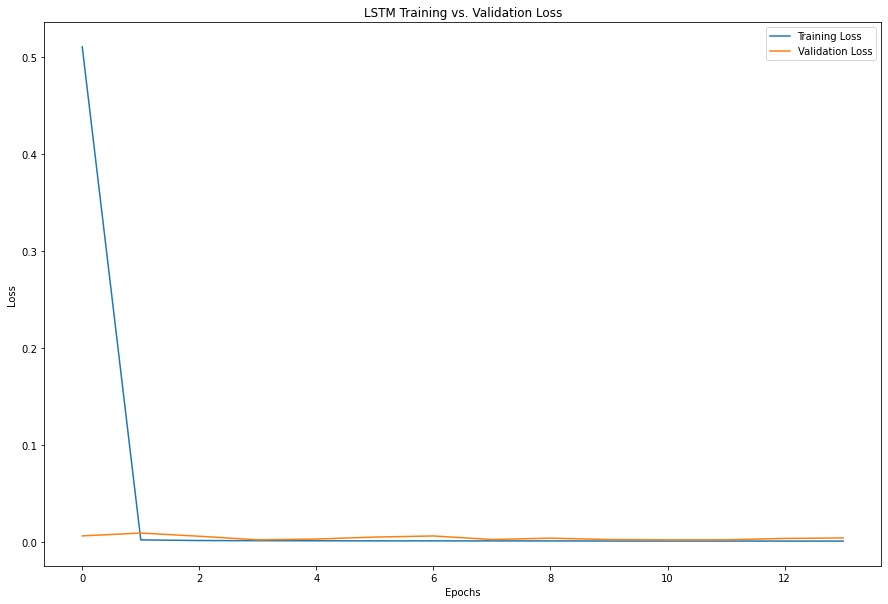

In [14]:
%matplotlib inline


plt.figure(figsize=(15, 10))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

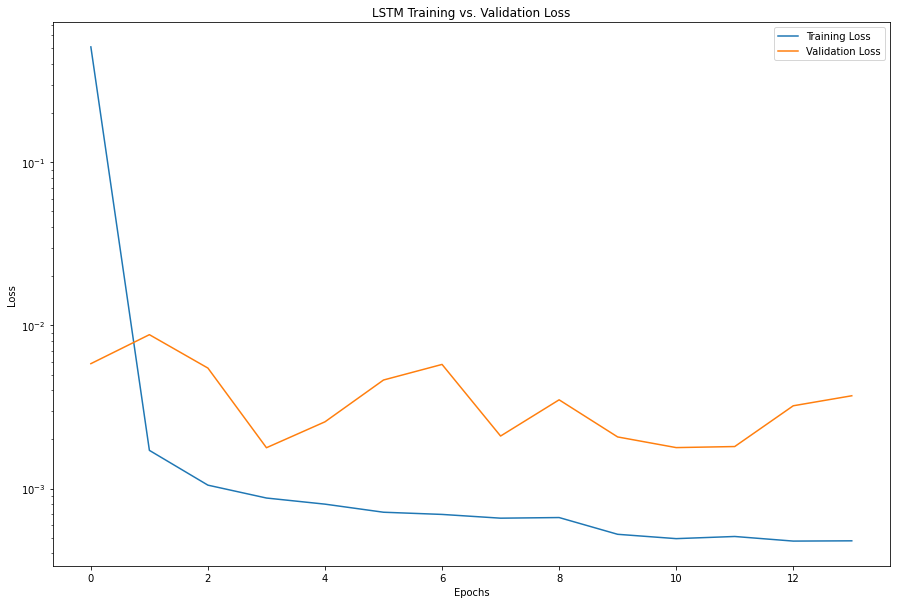

In [15]:
# Your existing plotting code with log scale

plt.figure(figsize=(15, 10))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.yscale('log')  # Setting the y-axis to logarithmic scale


plt.legend()
plt.show()

### Actual and Predicted Price Plot 

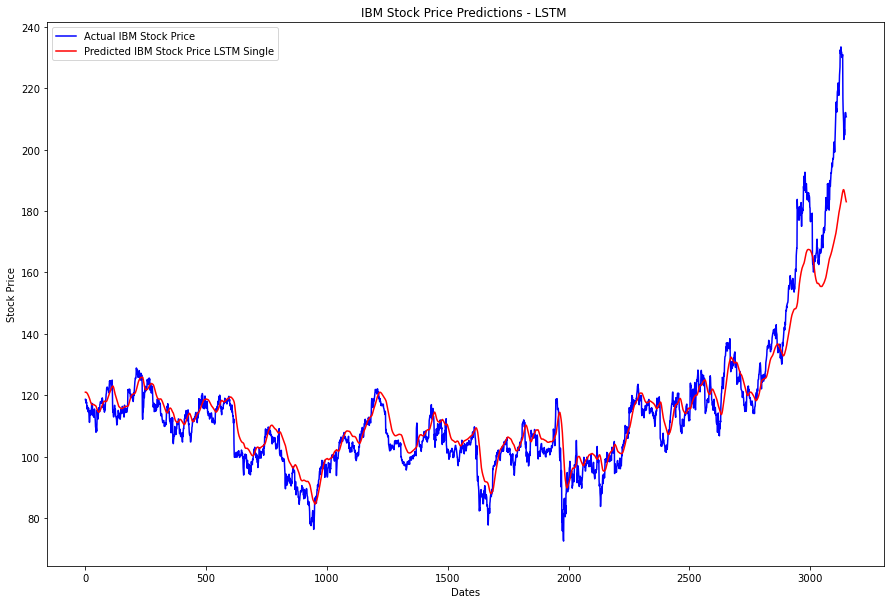

In [18]:
plt.figure(figsize=(15, 10))
plt.plot(actual_prices, color="blue", label="Actual IBM Stock Price")
plt.plot(predicted_prices, color="red", label="Predicted IBM Stock Price LSTM Single")
plt.title("IBM Stock Price Predictions - LSTM ")
plt.xlabel("Dates")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

## New random search (callback optimziation with other hyperparameter)

In [18]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


param_ranges = {
    "lstm_units": (32, 256),          
    "batch_size": (16, 128),           
    "t_steps": (30, 120),          
    "early_stopping_patience": (5, 20),  
    "reduce_lr_factor": (0.1, 0.5),      
    "reduce_lr_patience": (2, 10),      
    "reduce_lr_min_lr": (1e-6, 1e-4)     }


def generate_random_params():
    lstm_units = random.randint(param_ranges["lstm_units"][0], param_ranges["lstm_units"][1])
    batch_size = random.randint(param_ranges["batch_size"][0], param_ranges["batch_size"][1])
    t_steps = random.randint(param_ranges["t_steps"][0], param_ranges["t_steps"][1])
    early_stopping_patience = random.randint(param_ranges["early_stopping_patience"][0], param_ranges["early_stopping_patience"][1])
    reduce_lr_factor = random.uniform(param_ranges["reduce_lr_factor"][0], param_ranges["reduce_lr_factor"][1])
    reduce_lr_patience = random.randint(param_ranges["reduce_lr_patience"][0], param_ranges["reduce_lr_patience"][1])
    reduce_lr_min_lr = random.uniform(param_ranges["reduce_lr_min_lr"][0], param_ranges["reduce_lr_min_lr"][1])
    return lstm_units, batch_size, t_steps, early_stopping_patience, reduce_lr_factor, reduce_lr_patience, reduce_lr_min_lr


def evaluate_model(lstm_units, batch_size, t_steps, early_stopping_patience, reduce_lr_factor, reduce_lr_patience, reduce_lr_min_lr):

    global X_train, y_train, X_test, y_test
    X, y = create_dataset(model_scaled_features, model_scaled_target, t_steps)
    train_size = int(0.80 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]


    X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
    y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
    X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
    y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

    input_shape = (t_steps, X_train.shape[2])

    model = Sequential([
    # First LSTM layer with regularization
    LSTM(lstm_units, return_sequences=True,
            kernel_regularizer=l2(0.01),
            recurrent_regularizer=l2(0.01),
            input_shape=input_shape),
    Dropout(0.2),

    # Second LSTM layer
    LSTM(lstm_units, return_sequences=False,
            kernel_regularizer=l2(0.01),
            recurrent_regularizer=l2(0.01)),
    Dropout(0.2),

    # Output layer
    Dense(1) ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=early_stopping_patience,
    restore_best_weights=True)

    reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=reduce_lr_factor,
    patience=reduce_lr_patience,
    min_lr=reduce_lr_min_lr )

    # Training model
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    val_loss = min(history.history['val_loss'])
    return val_loss

# Performing random search
n_samples = 20
best_params = None
best_loss = float("inf")

for i in range(n_samples):
    (lstm_units, batch_size, t_steps, early_stopping_patience, reduce_lr_factor, reduce_lr_patience, reduce_lr_min_lr) = generate_random_params()

    # Log the parameters being tested
    print(f"\nTesting Hyperparameters: LSTM Units = {lstm_units}, Batch Size = {batch_size}, "
          f"Time Steps = {t_steps}, Early Stopping Patience = {early_stopping_patience}, "
          f"Reduce LR Factor = {reduce_lr_factor:.2f}, Reduce LR Patience = {reduce_lr_patience}, "
          f"Min LR = {reduce_lr_min_lr:.6f}")

    
    # Evaluate the model
    val_loss = evaluate_model(lstm_units, batch_size, t_steps, early_stopping_patience, reduce_lr_factor, reduce_lr_patience, reduce_lr_min_lr)
    
    print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

    # Log the result
    print(f"Validation Loss: {val_loss:.6f}")

    # Update best parameters if the current loss is lower
    if val_loss < best_loss:
        best_loss = val_loss
        best_params = (lstm_units, batch_size, t_steps, early_stopping_patience, reduce_lr_factor, reduce_lr_patience, reduce_lr_min_lr)


# Print the best hyperparameters and their validation loss
print(f"\nBest Hyperparameters: LSTM Units = {best_params[0]}, Batch Size = {best_params[1]}, "
      f"Time Steps = {best_params[2]}, Early Stopping Patience = {best_params[3]}, "
      f"Reduce LR Factor = {best_params[4]:.2f}, Reduce LR Patience = {best_params[5]}, "
      f"Min LR = {best_params[6]:.6f}")
print(f"Best Validation Loss = {best_loss:.6f}")


Testing Hyperparameters: LSTM Units = 129, Batch Size = 98, Time Steps = 115, Early Stopping Patience = 14, Reduce LR Factor = 0.34, Reduce LR Patience = 9, Min LR = 0.000043
Epoch 1/10
129/129 [==============================] - 5s 17ms/step - loss: 1.0057 - val_loss: 0.0330 - lr: 0.0010
Epoch 2/10
129/129 [==============================] - 2s 12ms/step - loss: 0.0082 - val_loss: 0.0048 - lr: 0.0010
Epoch 3/10
129/129 [==============================] - 2s 12ms/step - loss: 0.0018 - val_loss: 0.0039 - lr: 0.0010
Epoch 4/10
129/129 [==============================] - 2s 12ms/step - loss: 0.0012 - val_loss: 0.0030 - lr: 0.0010
Epoch 5/10
129/129 [==============================] - 2s 12ms/step - loss: 9.7324e-04 - val_loss: 0.0032 - lr: 0.0010
Epoch 6/10
129/129 [==============================] - 2s 12ms/step - loss: 8.6602e-04 - val_loss: 0.0017 - lr: 0.0010
Epoch 7/10
129/129 [==============================] - 2s 12ms/step - loss: 7.5620e-04 - val_loss: 0.0036 - lr: 0.0010
Epoch 8/10
129

### Using these hyperparamters in LSTM model

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

t_steps = 30
X, y = create_dataset(model_scaled_features, model_scaled_target, t_steps)

train_size = int(0.80 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#converting into tensor
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

input_shape = (X_train.shape[1], X_train.shape[2])

#batch size and no of epochs
num_epochs = 30
batch_size = 56

model_optimized = Sequential([
    # First LSTM layer with regularization
    LSTM(245, return_sequences=True,
            kernel_regularizer=l2(0.01),
            recurrent_regularizer=l2(0.01),
            input_shape=input_shape),
    Dropout(0.2),

    # Second LSTM layer
    LSTM(245, return_sequences=False,
            kernel_regularizer=l2(0.01),
            recurrent_regularizer=l2(0.01)),
    Dropout(0.2),

    # Output layer
    Dense(1)
])

model_optimized.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=13,
    restore_best_weights=True
)

# Reduce learning rate when plateau is reached
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.12,
    patience=6,
    min_lr=0.000083
)

history_lstm = model_optimized.fit(
        X_train, y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

Epoch 1/30
226/226 [==============================] - 5s 8ms/step - loss: 0.7735 - val_loss: 0.0038 - lr: 0.0010
Epoch 2/30
226/226 [==============================] - 1s 5ms/step - loss: 0.0016 - val_loss: 0.0059 - lr: 0.0010
Epoch 3/30
226/226 [==============================] - 1s 5ms/step - loss: 9.8652e-04 - val_loss: 0.0044 - lr: 0.0010
Epoch 4/30
226/226 [==============================] - 1s 5ms/step - loss: 8.3422e-04 - val_loss: 0.0022 - lr: 0.0010
Epoch 5/30
226/226 [==============================] - 1s 5ms/step - loss: 7.2577e-04 - val_loss: 0.0011 - lr: 0.0010
Epoch 6/30
226/226 [==============================] - 1s 5ms/step - loss: 6.8654e-04 - val_loss: 0.0011 - lr: 0.0010
Epoch 7/30
226/226 [==============================] - 1s 5ms/step - loss: 6.4017e-04 - val_loss: 0.0019 - lr: 0.0010
Epoch 8/30
226/226 [==============================] - 1s 5ms/step - loss: 5.8813e-04 - val_loss: 0.0013 - lr: 0.0010
Epoch 9/30
226/226 [==============================] - 1s 5ms/step - loss

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

predictions = model_optimized.predict(X_test)

# Adding dummy columns to match the original scaled data shape (5 columns)
# 4 dummy columns to match Open, High, Low, Volume
dummy_columns = np.zeros((predictions.shape[0], 4))
predicted_prices_scaled = np.concatenate((dummy_columns, predictions), axis=1)

# Applying inverse transformation to get back to original scale
predicted_prices = model_feature_scaler.inverse_transform(predicted_prices_scaled)[:, -1]

# for actual prices
actual_prices_scaled = np.concatenate((dummy_columns, y_test.numpy().reshape(-1, 1)), axis=1)
actual_prices = model_feature_scaler.inverse_transform(actual_prices_scaled)[:, -1]

# Calculating metrics
lstm_mse, lstm_rmse, lstm_mae = calculate_metrics(actual_prices, predicted_prices)
print(f'Random Search Optimized LSTM Model - MSE: {lstm_mse:.4f}, RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}')

99/99 [==============================] - 1s 2ms/step
Random Search Optimized LSTM Model - MSE: 54.4399, RMSE: 7.3783, MAE: 5.2711


### Loss plot (training vs validation loss) 

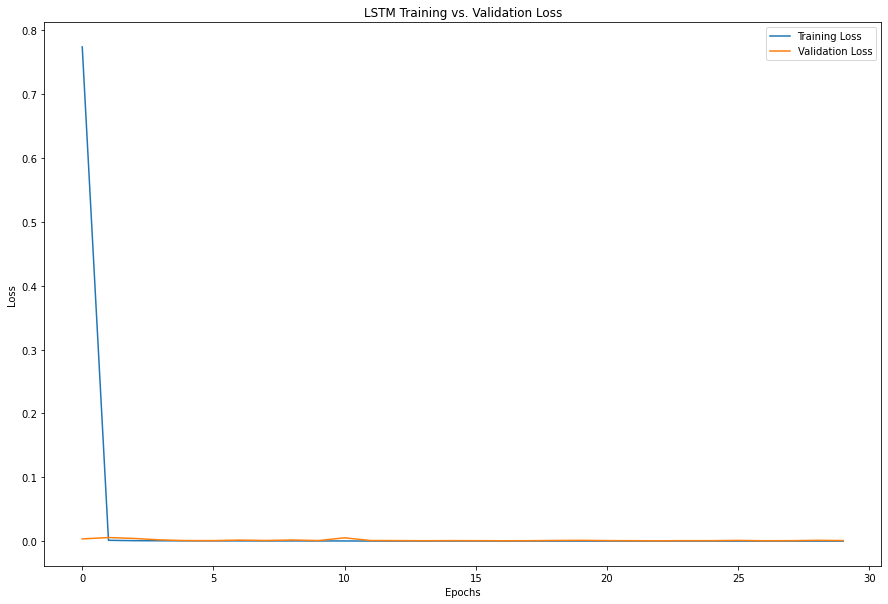

In [23]:
%matplotlib inline


plt.figure(figsize=(15, 10))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

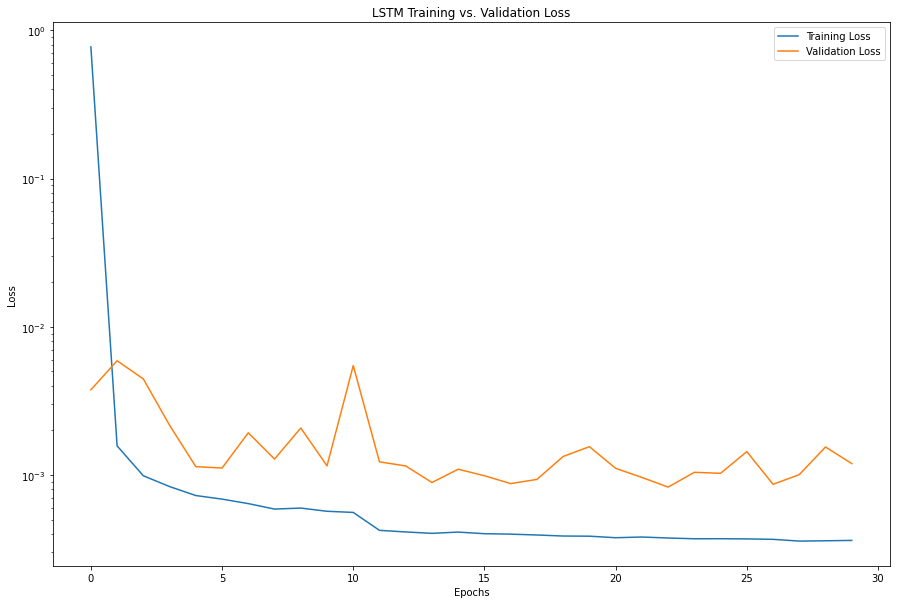

In [24]:
# Your existing plotting code with log scale

plt.figure(figsize=(15, 10))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.yscale('log')  # Setting the y-axis to logarithmic scale


plt.legend()
plt.show()

### Actual vs predicted price plot 

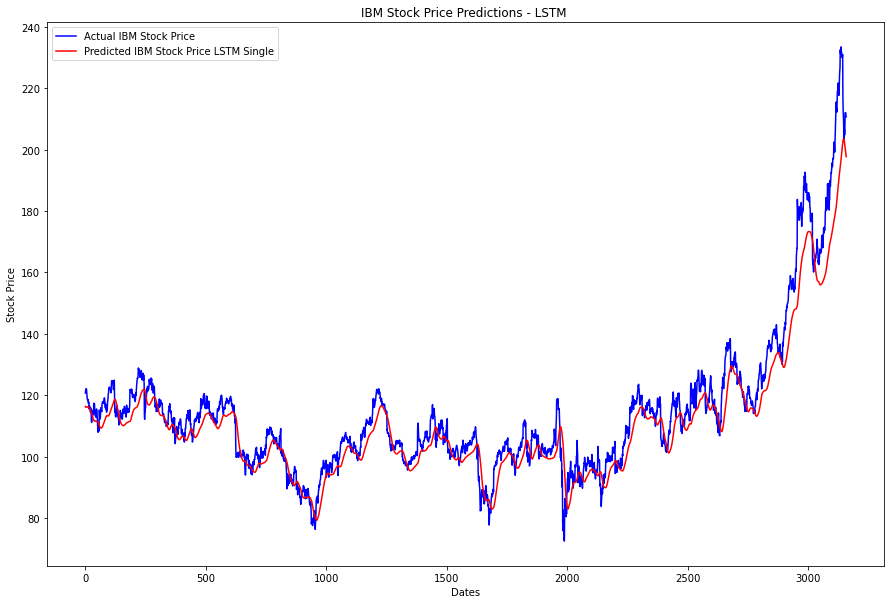

In [25]:
plt.figure(figsize=(15, 10))
plt.plot(actual_prices, color="blue", label="Actual IBM Stock Price")
plt.plot(predicted_prices, color="red", label="Predicted IBM Stock Price LSTM Single")
plt.title("IBM Stock Price Predictions - LSTM ")
plt.xlabel("Dates")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

### Now doing PSO optimization


In [26]:
!pip install pyswarm 

Defaulting to user installation because normal site-packages is not writeable


In [27]:
import random
import numpy as np
import pyswarm
from pyswarm import pso
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


param_ranges = {
    "lstm_units": (32, 256),           # Range for LSTM units
    "batch_size": (16, 128),           # Range for batch size
    "time_steps": (30, 120),           # Range for sequence length
    "early_stopping_patience": (5, 20),  # Range for early stopping patience
    "reduce_lr_factor": (0.1, 0.5),      # Range for reduce_lr factor
    "reduce_lr_patience": (2, 10),       # Range for reduce_lr patience
    "reduce_lr_min_lr": (1e-6, 1e-4)     # Range for minimum learning rate
}

bounds = [
    param_ranges["lstm_units"],            # Bounds for LSTM units
    param_ranges["batch_size"],            # Bounds for batch size
    param_ranges["time_steps"],            # Bounds for sequence length
    param_ranges["early_stopping_patience"],  # Bounds for early stopping patience
    param_ranges["reduce_lr_factor"],         # Bounds for reduce_lr factor
    param_ranges["reduce_lr_patience"],       # Bounds for reduce_lr patience
    param_ranges["reduce_lr_min_lr"]          # Bounds for reduce_lr min_lr
]

def objective_function(params):
    lstm_units = int(params[0])
    batch_size = int(params[1])
    time_steps = int(params[2])
    early_stopping_patience = int(params[3])
    reduce_lr_factor = float(params[4])
    reduce_lr_patience = int(params[5])
    reduce_lr_min_lr = float(params[6])
    
    print(f"\nTrying Hyperparameters: LSTM Units = {lstm_units}, Batch Size = {batch_size}, "
          f"Time Steps = {time_steps}, Early Stopping Patience = {early_stopping_patience}, "
          f"Reduce LR Factor = {reduce_lr_factor:.2f}, Reduce LR Patience = {reduce_lr_patience}, "
          f"Min LR = {reduce_lr_min_lr:.6f}")

    # Update sequence length for data creation
    global X_train, y_train, X_test, y_test
    X, y = create_dataset(model_scaled_features, model_scaled_target, t_steps)
    train_size = int(0.80 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Convert to tensors
    X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
    y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
    X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
    y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)
    
    input_shape = (t_steps, X_train.shape[2])
    print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

    # Define the new model architecture
    model = Sequential([
        # First LSTM layer with regularization
        LSTM(lstm_units, return_sequences=True,
             kernel_regularizer=l2(0.01),
             recurrent_regularizer=l2(0.01),
             input_shape=input_shape),
        Dropout(0.2),

        # Second LSTM layer
        LSTM(lstm_units, return_sequences=False,
             kernel_regularizer=l2(0.01),
             recurrent_regularizer=l2(0.01)),
        Dropout(0.2),

        # Output layer
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=early_stopping_patience,
        restore_best_weights=True
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=reduce_lr_factor,
        patience=reduce_lr_patience,
        min_lr=reduce_lr_min_lr
    )

    # Train the model
    history = model.fit(
        X_train_tensor, y_train_tensor,
        epochs=10,
        batch_size=batch_size,
        validation_data=(X_test_tensor, y_test_tensor),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Get validation loss
    val_loss = min(history.history['val_loss'])

    print(f"Validation Loss: {val_loss:.6f}")

    return val_loss

# Run PSO with the new model
best_params, best_loss = pso(
    objective_function,
    lb=[b[0] for b in bounds],  # Lower bounds
    ub=[b[1] for b in bounds],  # Upper bounds
    swarmsize=10,               # Number of particles
    maxiter=10,                 # Number of iterations
    debug=True                  # Enable logging
)

print(f"\nBest Hyperparameters: LSTM Units = {int(best_params[0])}, Batch Size = {int(best_params[1])}, "
      f"Time Steps = {int(best_params[2])}, Early Stopping Patience = {int(best_params[3])}, "
      f"Reduce LR Factor = {best_params[4]:.2f}, Reduce LR Patience = {int(best_params[5])}, "
      f"Min LR = {best_params[6]:.6f}")
print(f"Best Validation Loss = {best_loss:.6f}")

No constraints given.

Trying Hyperparameters: LSTM Units = 238, Batch Size = 121, Time Steps = 104, Early Stopping Patience = 11, Reduce LR Factor = 0.12, Reduce LR Patience = 2, Min LR = 0.000040
X_train shape: (12636, 30, 5), X_test shape: (3159, 30, 5)
Epoch 1/10
105/105 [==============================] - 4s 13ms/step - loss: 1.6424 - val_loss: 0.0286 - lr: 0.0010
Epoch 2/10
105/105 [==============================] - 1s 6ms/step - loss: 0.0068 - val_loss: 0.0029 - lr: 0.0010
Epoch 3/10
105/105 [==============================] - 1s 6ms/step - loss: 0.0019 - val_loss: 0.0030 - lr: 0.0010
Epoch 4/10
105/105 [==============================] - 1s 6ms/step - loss: 0.0013 - val_loss: 0.0055 - lr: 0.0010
Epoch 5/10
105/105 [==============================] - 1s 6ms/step - loss: 0.0010 - val_loss: 0.0025 - lr: 1.1968e-04
Epoch 6/10
105/105 [==============================] - 1s 6ms/step - loss: 9.8242e-04 - val_loss: 0.0030 - lr: 1.1968e-04
Epoch 7/10
105/105 [==============================] 

## Using these values and testing our model

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

t_steps = 84
X, y = create_dataset(model_scaled_features, model_scaled_target, t_steps)

train_size = int(0.80 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#converting into tensor
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

input_shape = (X_train.shape[1], X_train.shape[2])

#batch size and no of epochs
num_epochs = 30
batch_size = 43

model_optimized = Sequential([
    # First LSTM layer with regularization
    LSTM(242, return_sequences=True,
            kernel_regularizer=l2(0.01),
            recurrent_regularizer=l2(0.01),
            input_shape=input_shape),
    Dropout(0.2),

    # Second LSTM layer
    LSTM(242, return_sequences=False,
            kernel_regularizer=l2(0.01),
            recurrent_regularizer=l2(0.01)),
    Dropout(0.2),

    # Output layer
    Dense(1)
])

model_optimized.compile(optimizer=Adam(learning_rate=0.001090), loss='mean_squared_error')

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=17,
    restore_best_weights=True
)

# Reduce learning rate when plateau is reached
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.26,
    patience=8,
    min_lr=0.000020
)

history_lstm = model_optimized.fit(
        X_train, y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

Epoch 1/30
293/293 [==============================] - 7s 12ms/step - loss: 0.5424 - val_loss: 0.0036 - lr: 0.0011
Epoch 2/30
293/293 [==============================] - 3s 10ms/step - loss: 0.0012 - val_loss: 0.0029 - lr: 0.0011
Epoch 3/30
293/293 [==============================] - 3s 10ms/step - loss: 8.4891e-04 - val_loss: 0.0015 - lr: 0.0011
Epoch 4/30
293/293 [==============================] - 3s 10ms/step - loss: 7.4997e-04 - val_loss: 0.0012 - lr: 0.0011
Epoch 5/30
293/293 [==============================] - 3s 10ms/step - loss: 6.7360e-04 - val_loss: 0.0013 - lr: 0.0011
Epoch 6/30
293/293 [==============================] - 3s 10ms/step - loss: 6.5822e-04 - val_loss: 0.0060 - lr: 0.0011
Epoch 7/30
293/293 [==============================] - 3s 10ms/step - loss: 7.1233e-04 - val_loss: 0.0014 - lr: 0.0011
Epoch 8/30
293/293 [==============================] - 3s 10ms/step - loss: 5.8260e-04 - val_loss: 0.0012 - lr: 0.0011
Epoch 9/30
293/293 [==============================] - 3s 10ms/st

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

predictions = model_optimized.predict(X_test)

# Adding dummy columns to match the original scaled data shape (5 columns)
# 4 dummy columns to match Open, High, Low, Volume
dummy_columns = np.zeros((predictions.shape[0], 4))
predicted_prices_scaled = np.concatenate((dummy_columns, predictions), axis=1)

# Applying inverse transformation to get back to original scale
predicted_prices = model_feature_scaler.inverse_transform(predicted_prices_scaled)[:, -1]

# for actual prices
actual_prices_scaled = np.concatenate((dummy_columns, y_test.numpy().reshape(-1, 1)), axis=1)
actual_prices = model_feature_scaler.inverse_transform(actual_prices_scaled)[:, -1]

# Calculating metrics
lstm_mse, lstm_rmse, lstm_mae = calculate_metrics(actual_prices, predicted_prices)
print(f'PSO Optimized LSTM Model - MSE: {lstm_mse:.4f}, RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}')

99/99 [==============================] - 1s 4ms/step
PSO Optimized LSTM Model - MSE: 49.4632, RMSE: 7.0330, MAE: 4.7454


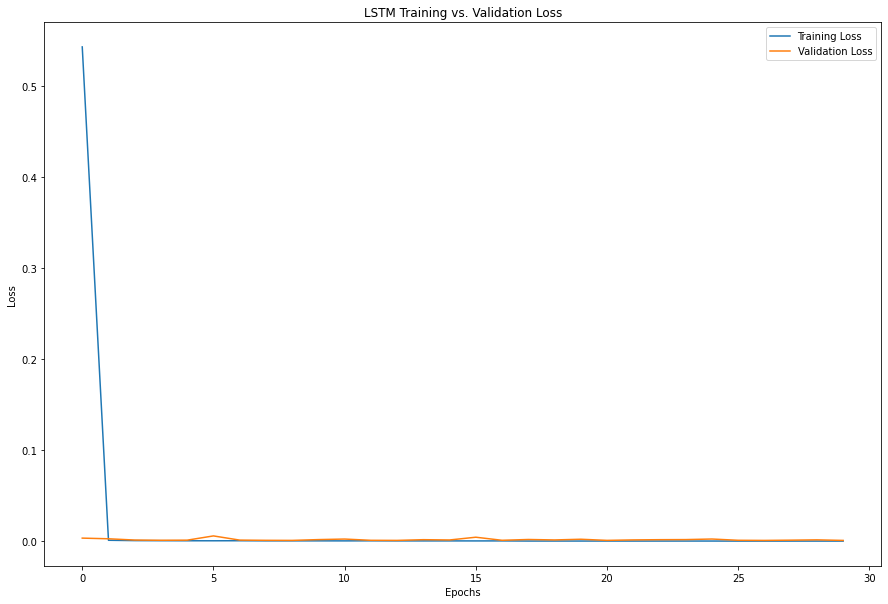

In [30]:
%matplotlib inline


plt.figure(figsize=(15, 10))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

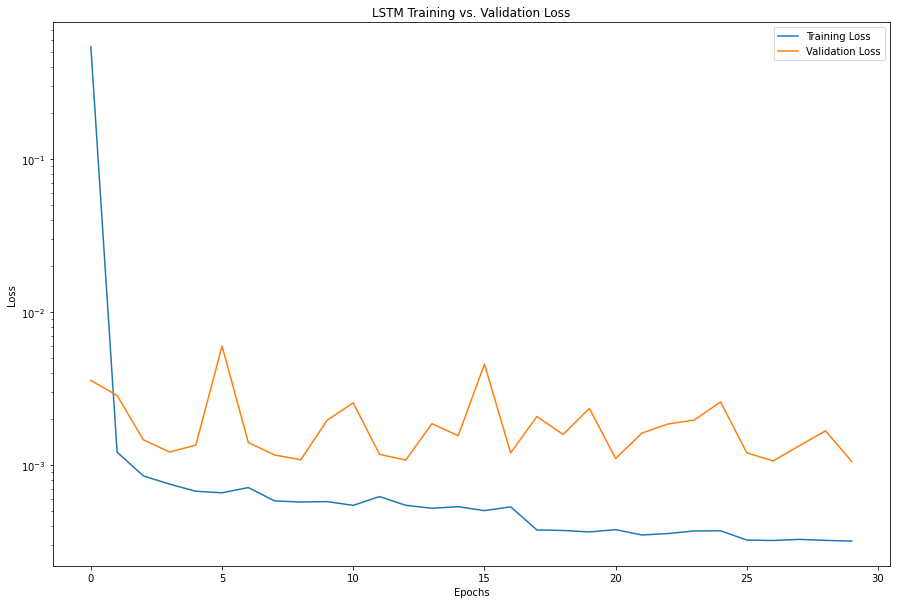

In [31]:
# Your existing plotting code with log scale

plt.figure(figsize=(15, 10))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.yscale('log')  # Setting the y-axis to logarithmic scale


plt.legend()
plt.show()

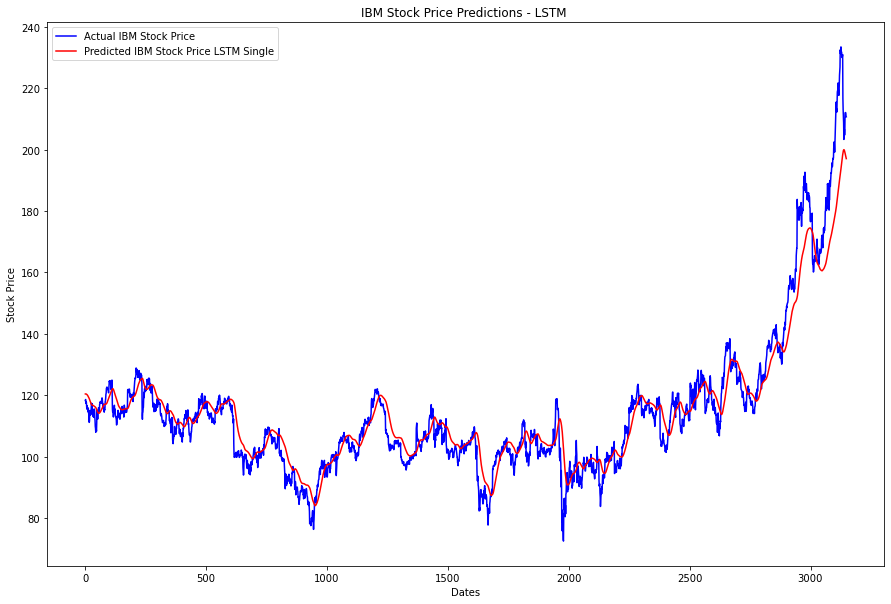

In [32]:
plt.figure(figsize=(15, 10))
plt.plot(actual_prices, color="blue", label="Actual IBM Stock Price")
plt.plot(predicted_prices, color="red", label="Predicted IBM Stock Price LSTM Single")
plt.title("IBM Stock Price Predictions - LSTM ")
plt.xlabel("Dates")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

## Genetics Algorithm (GA)


In [16]:
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import numpy as np

param_ranges = {
    "lstm_units": (32, 256),           # Range for LSTM units
    "batch_size": (16, 128),           # Range for batch size
    "time_steps": (30, 120),           # Range for sequence length
    "early_stopping_patience": (5, 20),  # Range for early stopping patience
    "reduce_lr_factor": (0.1, 0.5),      # Range for reduce_lr factor
    "reduce_lr_patience": (2, 10),       # Range for reduce_lr patience
    "reduce_lr_min_lr": (1e-6, 1e-4)     # Range for minimum learning rate
}

# Initialize population
def initialize_population(pop_size):
    population = []
    for _ in range(pop_size):
        individual = {
            "lstm_units": random.randint(param_ranges["lstm_units"][0], param_ranges["lstm_units"][1]),
            "batch_size": random.randint(param_ranges["batch_size"][0], param_ranges["batch_size"][1]),
            "time_steps": random.randint(param_ranges["time_steps"][0], param_ranges["time_steps"][1]),
            "early_stopping_patience": random.randint(param_ranges["early_stopping_patience"][0], param_ranges["early_stopping_patience"][1]),
            "reduce_lr_factor": random.uniform(param_ranges["reduce_lr_factor"][0], param_ranges["reduce_lr_factor"][1]),
            "reduce_lr_patience": random.randint(param_ranges["reduce_lr_patience"][0], param_ranges["reduce_lr_patience"][1]),
            "reduce_lr_min_lr": random.uniform(param_ranges["reduce_lr_min_lr"][0], param_ranges["reduce_lr_min_lr"][1])
        }
        population.append(individual)
    return population


def fitness_function(individual):
    lstm_units = individual["lstm_units"]
    batch_size = individual["batch_size"]
    time_steps = individual["time_steps"]
    early_stopping_patience = individual["early_stopping_patience"]
    reduce_lr_factor = individual["reduce_lr_factor"]
    reduce_lr_patience = individual["reduce_lr_patience"]
    reduce_lr_min_lr = individual["reduce_lr_min_lr"]
    
    print(f"\nEvaluating Individual: LSTM Units = {lstm_units}, Batch Size = {batch_size}, "
          f"Time Steps = {time_steps}, Early Stopping Patience = {early_stopping_patience}, "
          f"Reduce LR Factor = {reduce_lr_factor:.2f}, Reduce LR Patience = {reduce_lr_patience}, "
          f"Min LR = {reduce_lr_min_lr:.6f}")

    # Update sequence length for data creation
    global X_train, y_train, X_test, y_test
    X, y = create_dataset(model_scaled_features, model_scaled_target, time_steps)
    train_size = int(0.80 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Convert data to tensors
    X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
    y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
    X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
    y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

    input_shape = (X_train.shape[1], X_train.shape[2])
    
    model = Sequential([
    # First LSTM layer with regularization
    LSTM(242, return_sequences=True,
            kernel_regularizer=l2(0.01),
            recurrent_regularizer=l2(0.01),
            input_shape=input_shape),
    Dropout(0.2),

    # Second LSTM layer
    LSTM(242, return_sequences=False,
            kernel_regularizer=l2(0.01),
            recurrent_regularizer=l2(0.01)),
    Dropout(0.2),

    # Output layer
    Dense(1)])

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=early_stopping_patience,
        restore_best_weights=True
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=reduce_lr_factor,
        patience=reduce_lr_patience,
        min_lr=reduce_lr_min_lr
    )
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Training the model
    history = model.fit(
        X_train_tensor, y_train_tensor,
        epochs=10,  # Fixed higher epochs; early stopping will handle stopping
        batch_size=batch_size,
        validation_data=(X_test_tensor, y_test_tensor),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Calculating validation loss
    val_loss = min(history.history['val_loss'])

    return val_loss

def select_parents(population, fitnesses, num_parents):
    sorted_indices = np.argsort(fitnesses)
    return [population[i] for i in sorted_indices[:num_parents]]

def crossover(parent1, parent2):
    child = {}
    for key in parent1.keys():
        child[key] = parent1[key] if random.random() < 0.5 else parent2[key]
    return child

# Mutation
def mutate(individual):
    for key, value in individual.items():
        if random.random() < 0.2:  # Mutation rate
            if key in ["lstm_units", "batch_size", "time_steps", "early_stopping_patience", "reduce_lr_patience"]:
                individual[key] = random.randint(param_ranges[key][0], param_ranges[key][1])
            else:
                individual[key] = random.uniform(param_ranges[key][0], param_ranges[key][1])

                
# Genetic Algorithm
def genetic_algorithm(pop_size, num_generations, num_parents):
    population = initialize_population(pop_size)

    for generation in range(num_generations):
        print(f"\n=== Generation {generation + 1} ===")
        fitnesses = [fitness_function(ind) for ind in population]
        
        # Selecting the best individuals
        parents = select_parents(population, fitnesses, num_parents)

        # Generating next generation
        new_population = parents[:]
        while len(new_population) < pop_size:
            parent1, parent2 = random.sample(parents, 2)
            child = crossover(parent1, parent2)
            mutate(child)
            new_population.append(child)

        population = new_population

    # Returning the best individual
    final_fitnesses = [fitness_function(ind) for ind in population]
    best_index = np.argmin(final_fitnesses)
    return population[best_index], min(final_fitnesses)

best_hyperparameters, best_loss = genetic_algorithm(pop_size=10, num_generations=5, num_parents=4)

print("\nBest Hyperparameters:", best_hyperparameters)
print("Best Validation Loss:", best_loss)


=== Generation 1 ===

Evaluating Individual: LSTM Units = 148, Batch Size = 84, Time Steps = 98, Early Stopping Patience = 8, Reduce LR Factor = 0.45, Reduce LR Patience = 6, Min LR = 0.000002
Epoch 1/10
150/150 [==============================] - 6s 17ms/step - loss: 1.1558 - val_loss: 0.0066 - lr: 0.0010
Epoch 2/10
150/150 [==============================] - 2s 13ms/step - loss: 0.0027 - val_loss: 0.0050 - lr: 0.0010
Epoch 3/10
150/150 [==============================] - 2s 13ms/step - loss: 0.0013 - val_loss: 0.0046 - lr: 0.0010
Epoch 4/10
150/150 [==============================] - 2s 13ms/step - loss: 0.0010 - val_loss: 0.0040 - lr: 0.0010
Epoch 5/10
150/150 [==============================] - 2s 13ms/step - loss: 8.8996e-04 - val_loss: 0.0018 - lr: 0.0010
Epoch 6/10
150/150 [==============================] - 2s 13ms/step - loss: 7.5819e-04 - val_loss: 0.0013 - lr: 0.0010
Epoch 7/10
150/150 [==============================] - 2s 13ms/step - loss: 7.4985e-04 - val_loss: 0.0025 - lr: 0.0

## Testing our model in GA optimized parameters 

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

t_steps = 108
X, y = create_dataset(model_scaled_features, model_scaled_target, t_steps)

train_size = int(0.80 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#converting into tensor
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

input_shape = (X_train.shape[1], X_train.shape[2])

#batch size and no of epochs
num_epochs = 30
batch_size = 47

model_optimized = Sequential([
    # First LSTM layer with regularization
    LSTM(222, return_sequences=True,
            kernel_regularizer=l2(0.01),
            recurrent_regularizer=l2(0.01),
            input_shape=input_shape),
    Dropout(0.2),

    # Second LSTM layer
    LSTM(222, return_sequences=False,
            kernel_regularizer=l2(0.01),
            recurrent_regularizer=l2(0.01)),
    Dropout(0.2),

    # Output layer
    Dense(1)
])

model_optimized.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

# Reduce learning rate when plateau is reached
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.4142027272179486,
    patience=7,
    min_lr=1.3492242355288493e-06
)

history_lstm = model_optimized.fit(
        X_train, y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

Epoch 1/30
268/268 [==============================] - 7s 14ms/step - loss: 0.6240 - val_loss: 0.0059 - lr: 0.0010
Epoch 2/30
268/268 [==============================] - 3s 12ms/step - loss: 0.0014 - val_loss: 0.0026 - lr: 0.0010
Epoch 3/30
268/268 [==============================] - 3s 12ms/step - loss: 9.4028e-04 - val_loss: 0.0037 - lr: 0.0010
Epoch 4/30
268/268 [==============================] - 3s 12ms/step - loss: 7.7760e-04 - val_loss: 0.0032 - lr: 0.0010
Epoch 5/30
268/268 [==============================] - 3s 12ms/step - loss: 7.3568e-04 - val_loss: 0.0017 - lr: 0.0010
Epoch 6/30
268/268 [==============================] - 3s 12ms/step - loss: 6.4394e-04 - val_loss: 0.0014 - lr: 0.0010
Epoch 7/30
268/268 [==============================] - 3s 12ms/step - loss: 6.7191e-04 - val_loss: 0.0028 - lr: 0.0010
Epoch 8/30
268/268 [==============================] - 3s 12ms/step - loss: 6.4785e-04 - val_loss: 0.0026 - lr: 0.0010
Epoch 9/30
268/268 [==============================] - 3s 12ms/st

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

predictions = model_optimized.predict(X_test)

# Adding dummy columns to match the original scaled data shape (5 columns)
# 4 dummy columns to match Open, High, Low, Volume
dummy_columns = np.zeros((predictions.shape[0], 4))
predicted_prices_scaled = np.concatenate((dummy_columns, predictions), axis=1)

# Applying inverse transformation to get back to original scale
predicted_prices = model_feature_scaler.inverse_transform(predicted_prices_scaled)[:, -1]

# for actual prices
actual_prices_scaled = np.concatenate((dummy_columns, y_test.numpy().reshape(-1, 1)), axis=1)
actual_prices = model_feature_scaler.inverse_transform(actual_prices_scaled)[:, -1]

# Calculating metrics
lstm_mse, lstm_rmse, lstm_mae = calculate_metrics(actual_prices, predicted_prices)
print(f'GA Optimized LSTM Model - MSE: {lstm_mse:.4f}, RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}')

99/99 [==============================] - 1s 5ms/step
GA Optimized LSTM Model - MSE: 49.9178, RMSE: 7.0653, MAE: 4.7679


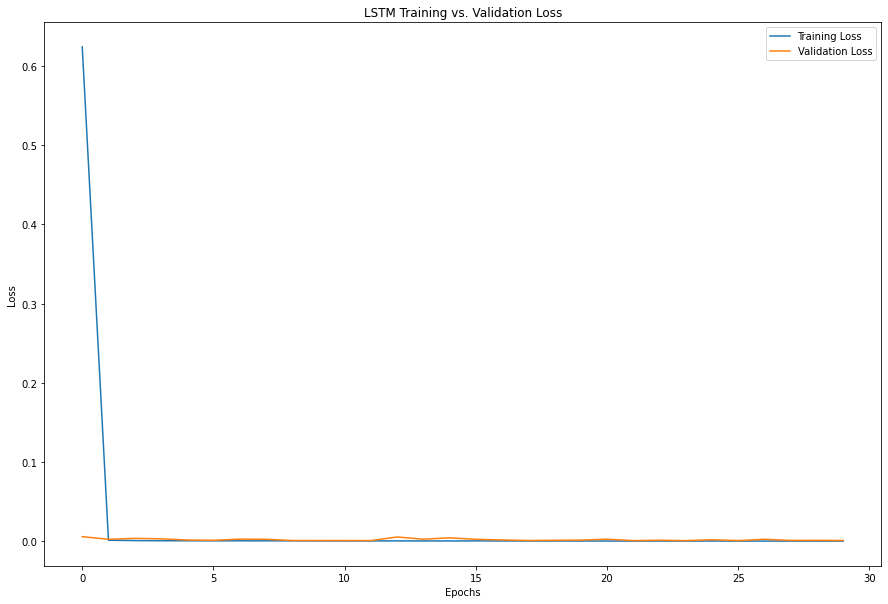

In [19]:
%matplotlib inline


plt.figure(figsize=(15, 10))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

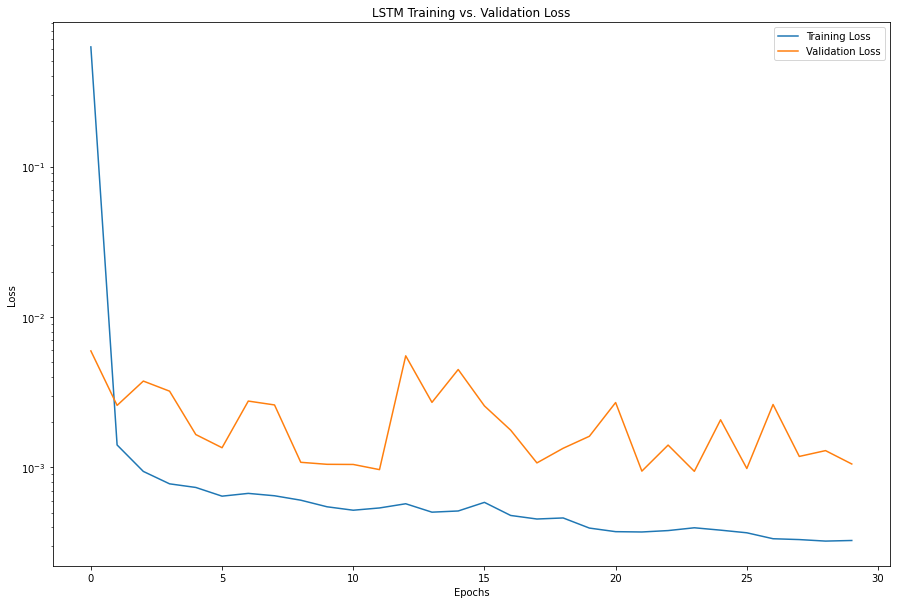

In [20]:
# Your existing plotting code with log scale

plt.figure(figsize=(15, 10))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.yscale('log')  # Setting the y-axis to logarithmic scale


plt.legend()
plt.show()

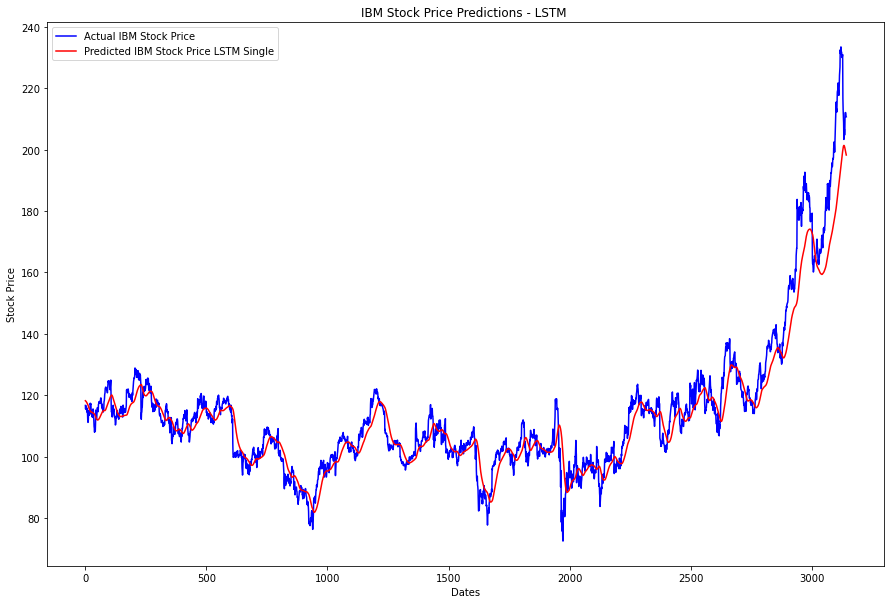

In [21]:
plt.figure(figsize=(15, 10))
plt.plot(actual_prices, color="blue", label="Actual IBM Stock Price")
plt.plot(predicted_prices, color="red", label="Predicted IBM Stock Price LSTM Single")
plt.title("IBM Stock Price Predictions - LSTM ")
plt.xlabel("Dates")
plt.ylabel("Stock Price")
plt.legend()
plt.show()